In [43]:
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

audio_data_dir = '../data/train_audio/'
csv_file = '../data/train_metadata.csv'

data = pd.read_csv(csv_file)
labels_arr = data['primary_label']
audio_data_filename_arr = data['filename']

waveforms = []
sample_rates = []
lengthWithLabel = []
num_of_not_exist = 0

for file_name in audio_data_filename_arr:
    audio_file = os.path.join(audio_data_dir, file_name)

    if os.path.exists(audio_file):
        waveform, sample_rate = librosa.load(audio_file, sr=None)

        waveforms.append(librosa.get_duration(y=waveform, sr=sample_rate))
        sample_rates.append(sample_rate)
        lengthWithLabel.append(
            {"label": file_name.split('/')[0], "duration": librosa.get_duration(y=waveform, sr=sample_rate)})
    else:
        num_of_not_exist += 1

min waveform  0.548
max waveform   2373.528
mean waveform   40.884945679604485
min sample rate  32000
max sample rate  32000
num of not exist  1


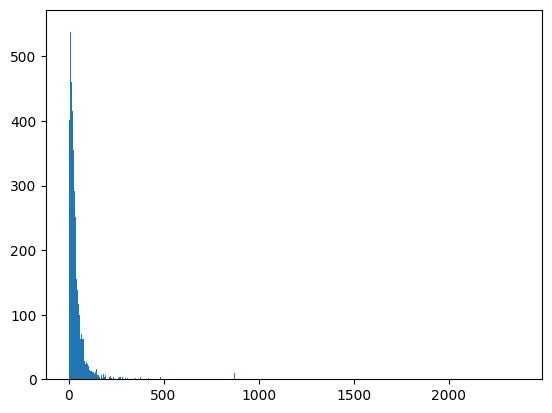

In [28]:
print('min waveform ', np.min(waveforms))
print('max waveform  ', np.max(waveforms))
print('mean waveform  ', np.mean(waveforms))

print('min sample rate ', np.min(sample_rates))
print('max sample rate ', np.max(sample_rates))

print('num of not exist ', num_of_not_exist)

plt.hist(x=waveforms, bins=2000)
plt.show()

In [29]:
numpyData = np.array(waveforms)

hist, bin_edges = np.histogram(numpyData, bins=2000)

# Print the counts in each range and the corresponding bin edges
for i in range(len(hist)):
    range_start = bin_edges[i]
    range_end = bin_edges[i + 1]
    count = hist[i]
    if count != 0:
        print(f"Range ({range_start}, {range_end}): {count}")

Range (0.548, 1.73449): 80
Range (1.73449, 2.92098): 226
Range (2.92098, 4.10747): 312
Range (4.10747, 5.29396): 401
Range (5.29396, 6.48045): 545
Range (6.48045, 7.66694): 542
Range (7.66694, 8.853430000000001): 509
Range (8.853430000000001, 10.03992): 457
Range (10.03992, 11.22641): 538
Range (11.22641, 12.4129): 476
Range (12.4129, 13.599390000000001): 516
Range (13.599390000000001, 14.78588): 443
Range (14.78588, 15.97237): 460
Range (15.97237, 17.158860000000004): 460
Range (17.158860000000004, 18.345350000000003): 447
Range (18.345350000000003, 19.531840000000003): 388
Range (19.531840000000003, 20.71833): 409
Range (20.71833, 21.90482): 415
Range (21.90482, 23.09131): 399
Range (23.09131, 24.2778): 366
Range (24.2778, 25.46429): 324
Range (25.46429, 26.650780000000005): 355
Range (26.650780000000005, 27.837270000000004): 303
Range (27.837270000000004, 29.023760000000003): 325
Range (29.023760000000003, 30.210250000000002): 269
Range (30.210250000000002, 31.39674): 291
Range (31.

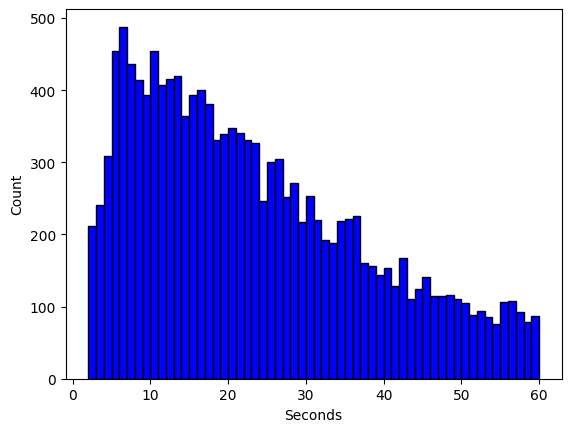

In [30]:
newWaveforms = []

for i in range(len(waveforms)):
    if 2 <= waveforms[i] <= 60:
        newWaveforms.append(waveforms[i])

plt.hist(x=newWaveforms, bins=58, color='b', edgecolor='black')
plt.xlabel("Seconds")
plt.ylabel("Count")
plt.show()

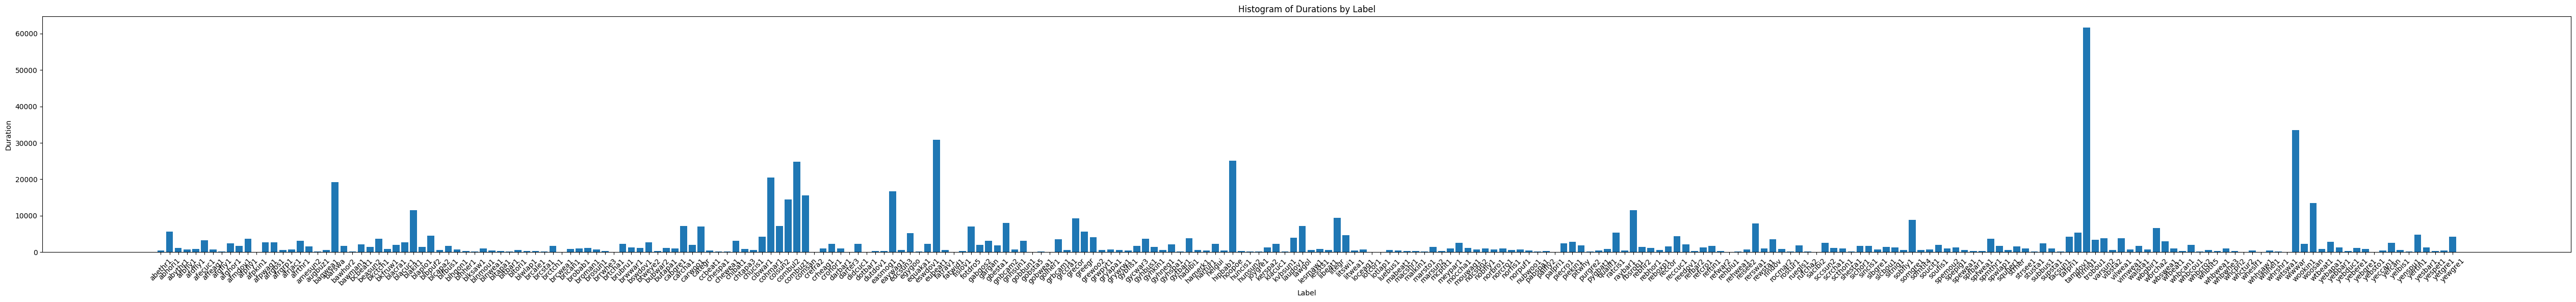

In [129]:
# Create a dictionary to group by label
grouped_data = {}

for item in lengthWithLabel:
    label = item["label"]
    duration = item["duration"]

    if label in grouped_data:
        grouped_data[label] += duration
    else:
        grouped_data[label] = duration

# Extract labels and durations from grouped_data
labels = grouped_data.keys()
durations = grouped_data.values()

plt.figure(figsize=(64, 6))
plt.bar(labels, durations)
plt.xlabel("Label")
plt.ylabel("Duration")
plt.title("Histogram of Durations by Label")
plt.xticks(rotation=45)  # Rotate labels for readability

# Display the pie chart
plt.show()

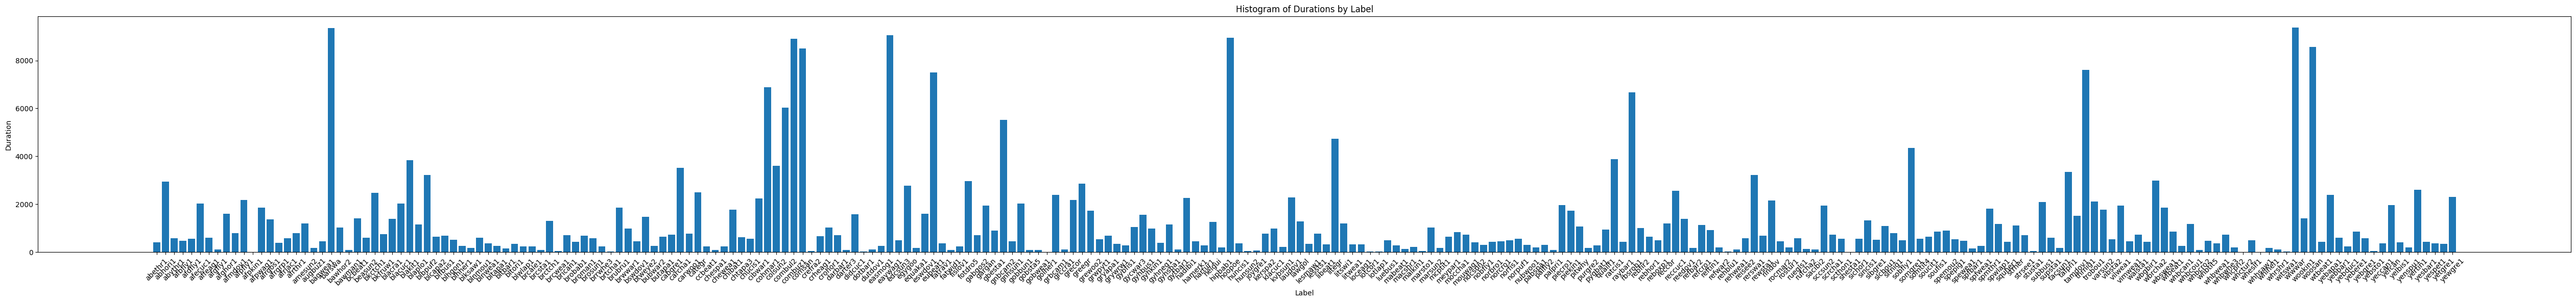

In [143]:
# Create a dictionary to group by label
grouped_data_v2 = {}

for item in lengthWithLabel:
    label = item["label"]
    duration = item["duration"]

    if 2 <= duration <= 60:
        if label in grouped_data_v2:
            grouped_data_v2[label] += duration
        else:
            grouped_data_v2[label] = duration

# Extract labels and durations from grouped_data
labels_v2 = grouped_data_v2.keys()
durations_v2 = grouped_data_v2.values()

plt.figure(figsize=(64, 6))
plt.bar(labels_v2, durations_v2)
plt.xlabel("Label")
plt.ylabel("Duration")
plt.title("Histogram of Durations by Label")
plt.xticks(rotation=45)  # Rotate labels for readability

# Display the pie chart
plt.show()

In [132]:
print(grouped_data.__sizeof__())
print(grouped_data_v2.__sizeof__())

6560
6560


In [148]:
# Extract labels and durations from grouped_data
labels_v2 = grouped_data_v2.keys()
durations_v2 = grouped_data_v2.values()

df_data = {"label", labels_v2}

df = pd.DataFrame(grouped_data_v2)
df

ValueError: If using all scalar values, you must pass an index

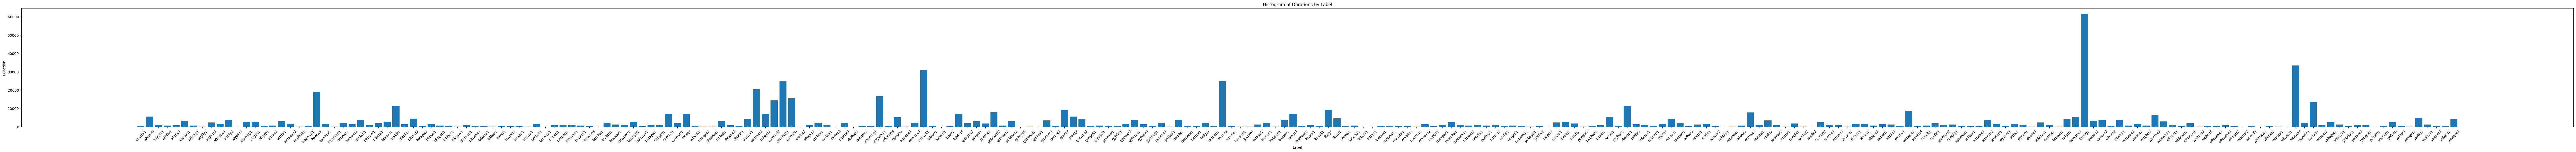

In [136]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

labels = grouped_data.keys()
durations = grouped_data.values()

# Create a bar chart (histogram)
fig, ax = plt.subplots(figsize=(128, 6))
ax.bar(labels, durations)
ax.set_xlabel("Label")
ax.set_ylabel("Duration")
ax.set_title("Histogram of Durations by Label")
plt.xticks(rotation=45)

# Create a scrollable widget for the figure
scrollable_output = widgets.Output()
with scrollable_output:
    display(fig)

# Display the scrollable figure
widgets.VBox([scrollable_output])

In [31]:
numpyData = np.array(waveforms)
df = pd.DataFrame(numpyData)

df.to_csv('data_stat.csv', index=False)

In [32]:
df.describe()

,0
count,16940.000000
mean,40.884946
std,69.612294
min,0.548000
25%,12.773875
50%,24.615672
75%,45.871031
max,2373.528000
